**Проанализируем данные игроков в известном футбольном симуляторе - FIFA 23. По сути сравниваются показатели игроков за всю историю футбола.**

Источник - https://www.kaggle.com/datasets/mohammedessam97/fifa-23-fut-players-dataset?resource=download (Data of All players in Ultimate team mode in FIFA 23 including Football Legends)

In [ ]:
data <- read.csv(file = '../content/Fifa 23 Fut Players.csv', header = TRUE)
fifa = data
top = data[0:100,]
best = data[0:20,]

**1. Реализовать аппроксимацию распределений данных с помощью
ядерных оценок.**

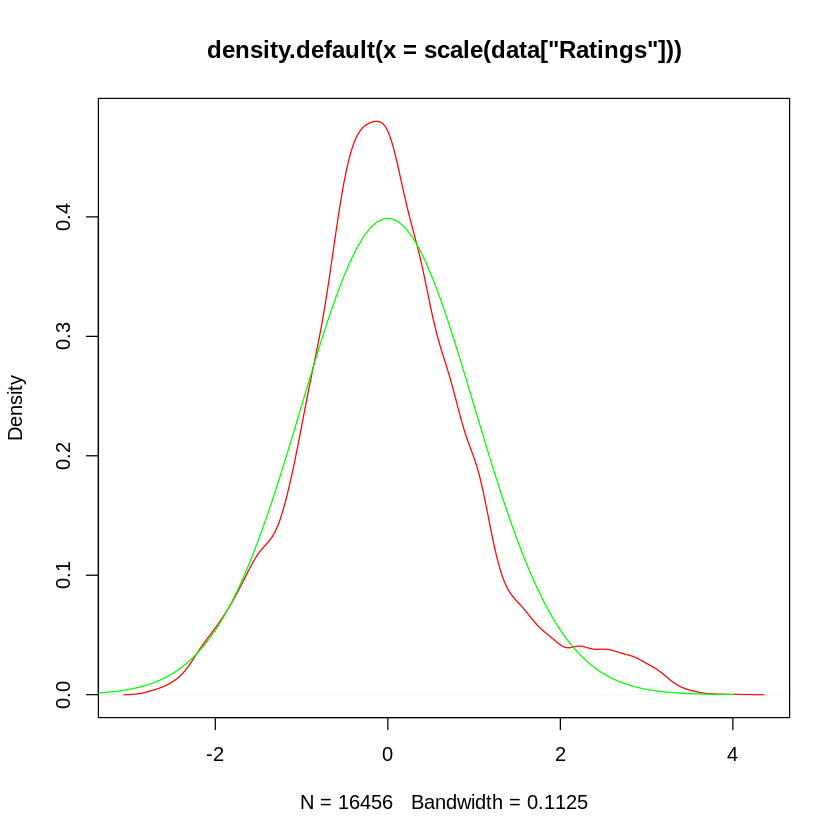

In [ ]:
plot(density(scale(data['Ratings'])), col = 'red')
x = seq(-4, 4, length = 100)
lines(x, dnorm(x), col = 'green')

Распределение рейтингов довольно хорошо поддаётся ядерной аппроксимации

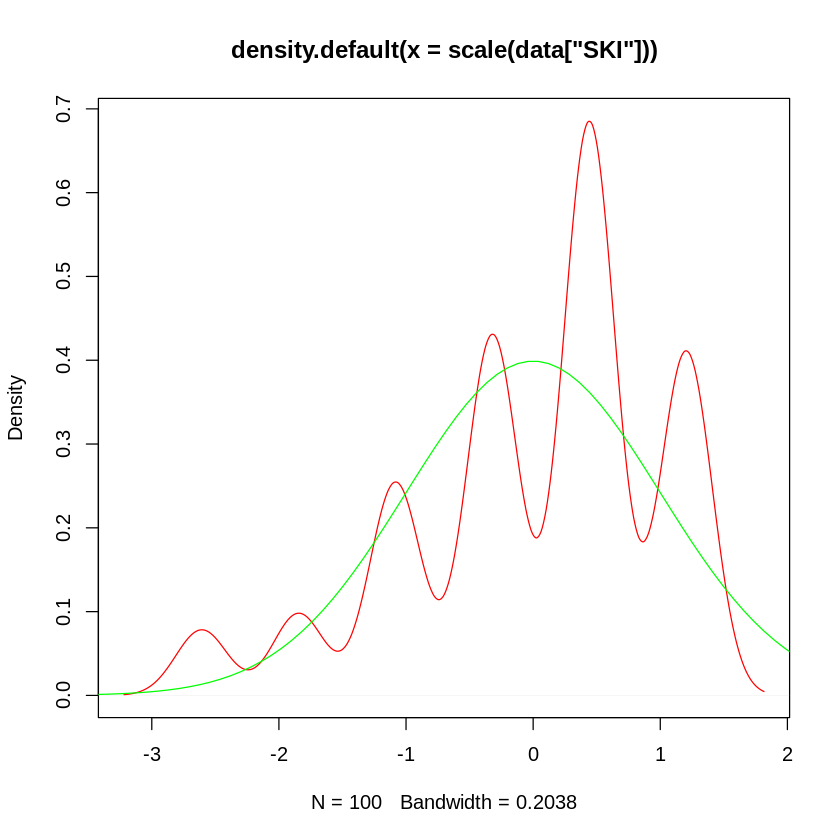

In [ ]:
plot(density(scale(data['SKI'])), col = 'red')
x = seq(-4, 4, length = 100)
lines(x, dnorm(x), col = 'green')

А вот распределение по количеству звёзд, характеризующих умения исполнять финты, уже не очень, тут нормальным распределением уже не получается сгладить

**2. Реализовать анализ данных с помощью cdplot, dotchart, boxplot и
stripchart.**

Будет строить зависимость рейтингов лучших футболистов и их национальностей

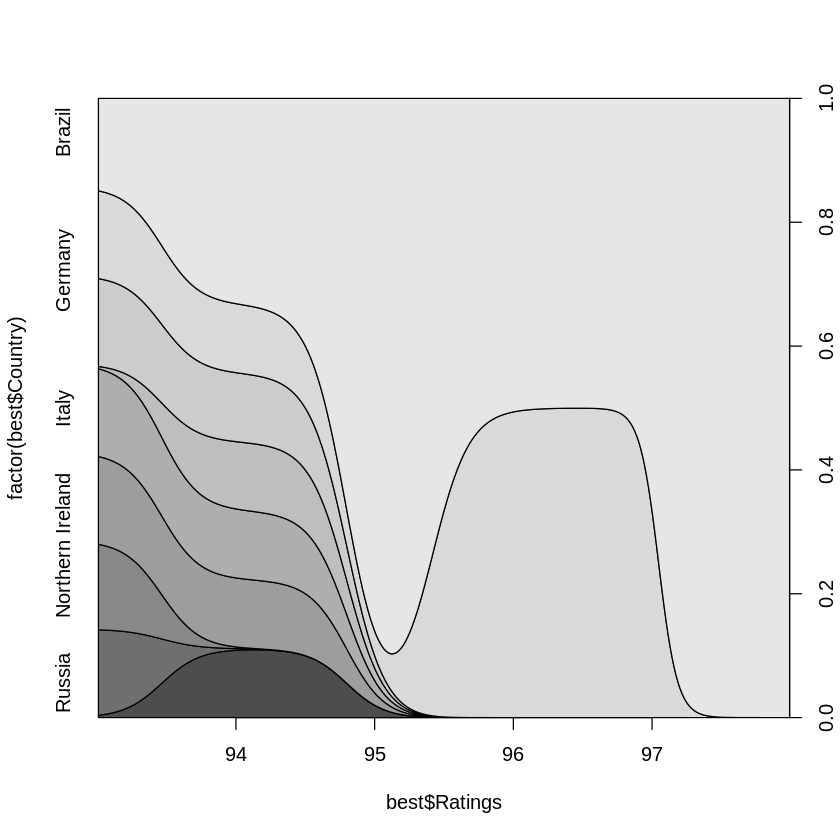

In [ ]:
cdplot(factor(best$Country) ~ best$Ratings)

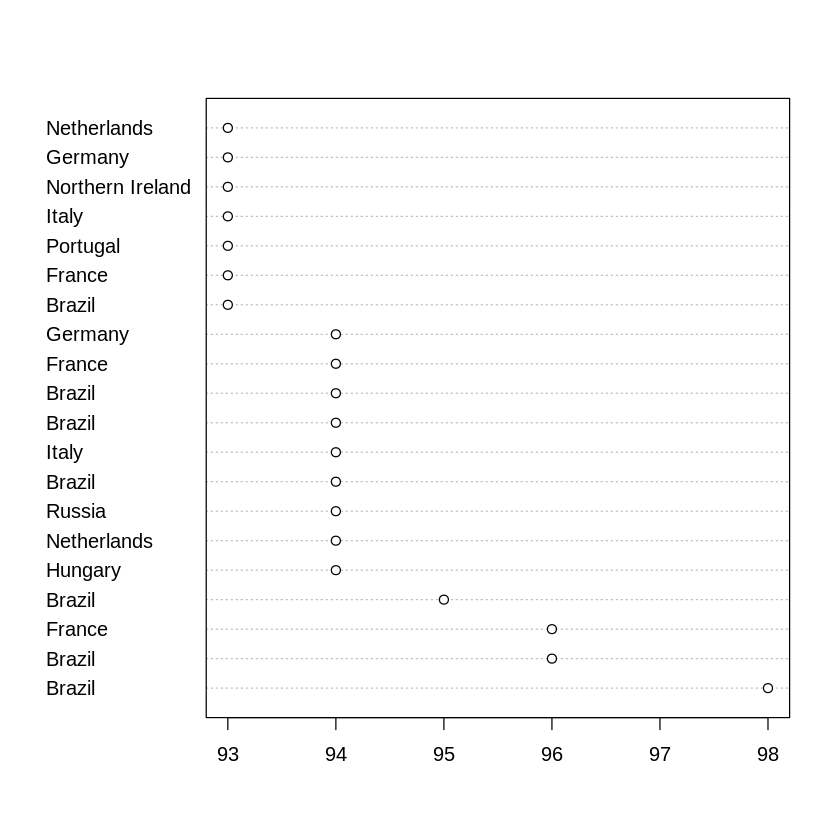

In [ ]:
dotchart(best$Ratings, labels = best$Country)

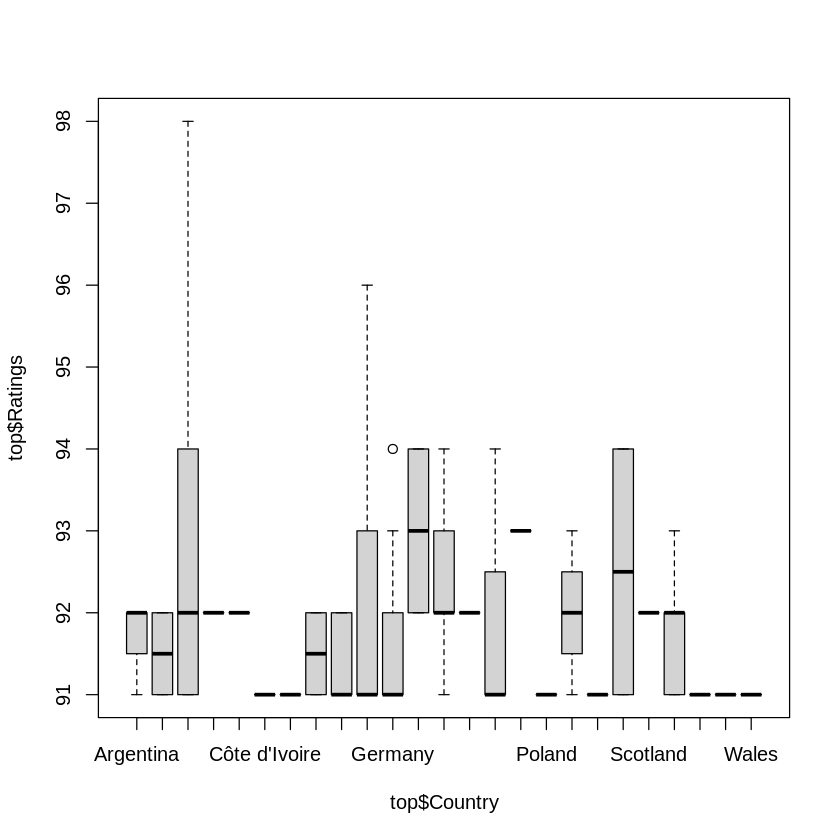

In [ ]:
boxplot(top$Ratings ~ top$Country)

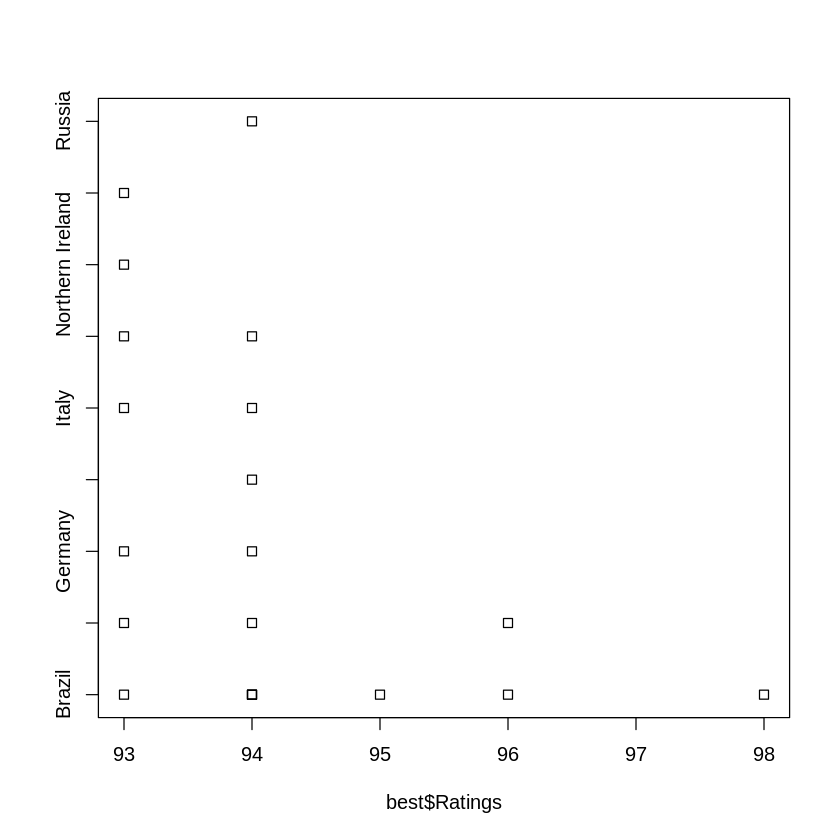

In [ ]:
stripchart(top$Ratings ~ top$Country)

**3. Проверить, являются ли наблюдения выбросами с точки зрения формальных статистических критериев Граббса и Q-теста Диксона.Визуализировать результаты.**

In [ ]:
install.packages("outliers")
library(outliers)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Grubbs test for two opposite outliers

data:  top$Ratings
G = 5.31131, U = 0.78216, p-value = 0.5357
alternative hypothesis: 91 and 98 are outliers


Найдены два выброса, минимальный и максимальный

In [ ]:
grubbs.test(top$Ratings, type = 11)


	Grubbs test for two opposite outliers

data:  top$Ratings
G = 5.31131, U = 0.78216, p-value = 0.5357
alternative hypothesis: 91 and 98 are outliers


pvalue > 0.5 => гипотеза отвергается

принимается альтернатива, что игроки с рейтингами 91 и 98 это выбросы

In [ ]:
dixon.test(best$Ratings, type = 0, opposite = FALSE, two.sided = TRUE)


	Dixon test for outliers

data:  best$Ratings
Q = 0.4, p-value = 0.2026
alternative hypothesis: highest value 98 is an outlier


pvalue > 0.05 => гипотеза отвергается и принимается альтернатива, что игрок с рейтингом 98 (Пеле) это выброс (его рейтинг слишком выбивается из распределения рейтингов лучших игроков)

**4. Воспользоваться инструментами для заполнения пропусков в
данных. Пропуски внести вручную и сравнить результаты заполнения с
истинными значениями.**

In [ ]:
install.packages("devtools")
devtools::install_version('DMwR', '0.4.1')
library("DMwR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘shiny’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘miniUI’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”



bitops   (NA -> 1.0-7 ) [CRAN]
caTools  (NA -> 1.18.2) [CRAN]
gtools   (NA -> 3.9.3 ) [CRAN]
zoo      (NA -> 1.8-11) [CRAN]
xts      (NA -> 0.12.2) [CRAN]
gplots   (NA -> 3.1.3 ) [CRAN]
TTR      (NA -> 0.24.3) [CRAN]
ROCR     (NA -> 1.0-11) [CRAN]
abind    (NA -> 1.4-5 ) [CRAN]
quantmod (NA -> 0.4.20) [CRAN]


Installing 10 packages: bitops, caTools, gtools, zoo, xts, gplots, TTR, ROCR, abind, quantmod

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Elements are nan:"
[1] 25
[1] "Metrics in mean case:"
[1] 1.13603


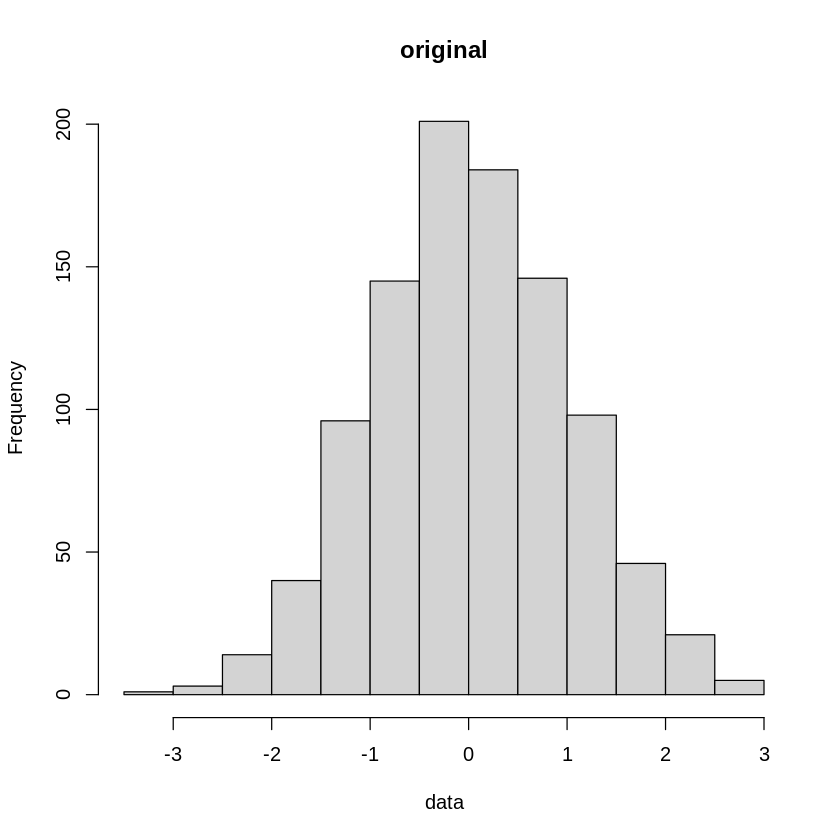

[1] "Metrics in median case:"
[1] 1.13595


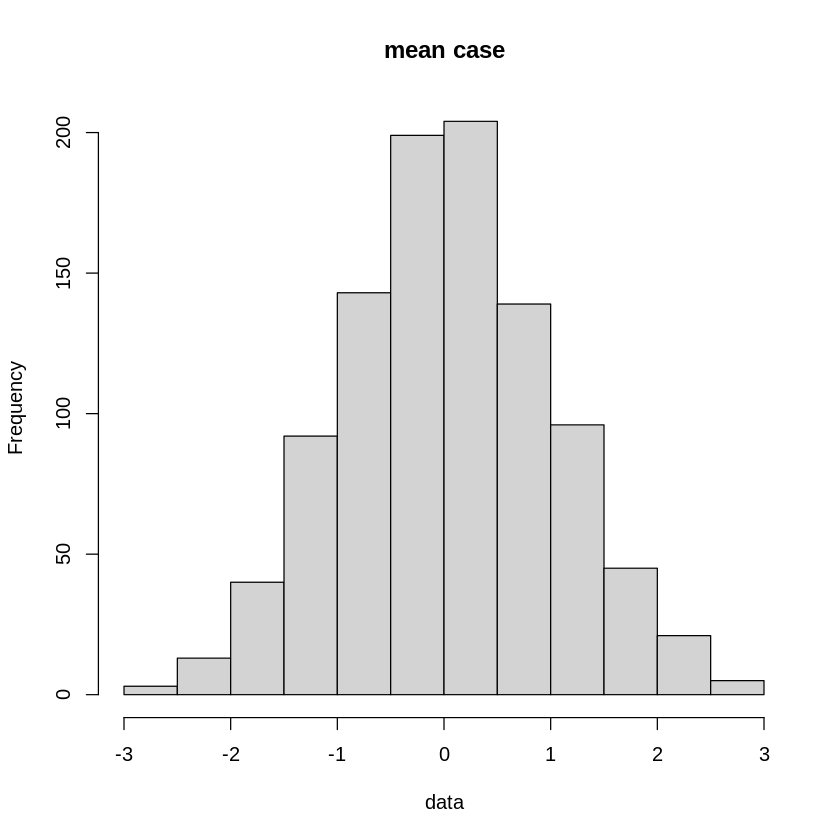

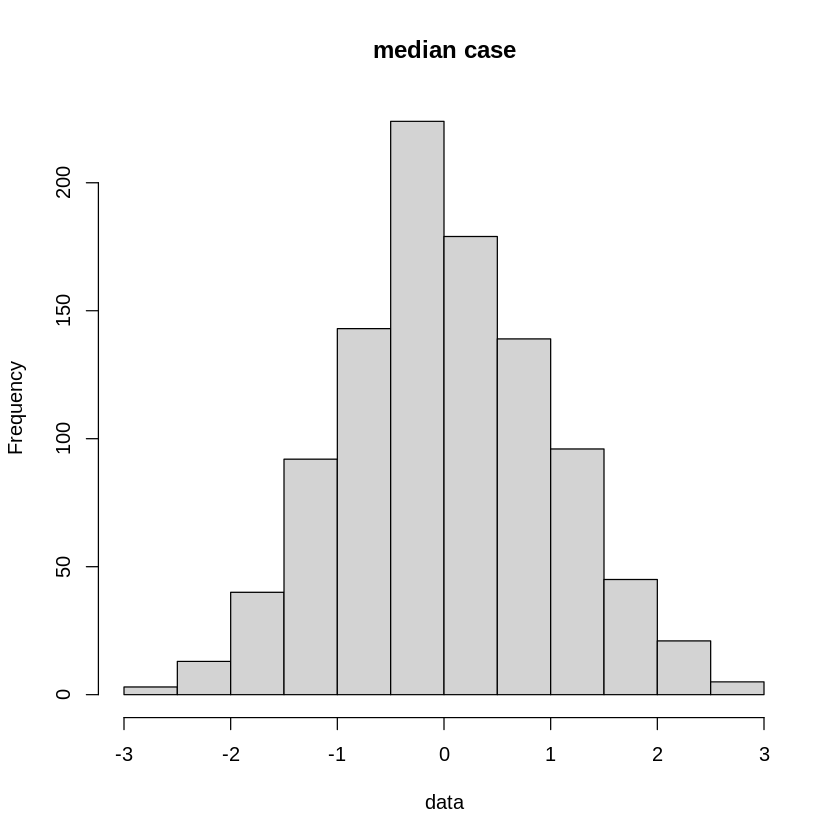

In [ ]:
library(ggplot2)
library(Metrics)
 
data <- rnorm(1000)
original <- data
hist(data, main='original')
 
missing_indexes = sample(1:length(data), 25)
 
# Способ 1 - через среднее
 
data[missing_indexes ] <- NA
print('Elements are nan:')
print(length(which(is.na(data))))
 
data[missing_indexes] <- mean(data, na.rm = T)
 
print('Metrics in mean case:')
actuals <- original[missing_indexes]
predicteds <- rep(mean(data, na.rm=T), length(actuals))
print(rmse(actuals, predicteds))
hist(data, main='mean case')
 
# Способ 2 - через медиану
 
data[missing_indexes] <- NA
 
data[missing_indexes] <- median(data, na.rm = T)
 
print('Metrics in median case:')
actuals <- original[missing_indexes]
predicteds <- rep(mean(data, na.rm=T), length(actuals))
print(rmse(actuals, predicteds))
hist(data, main='median case')

**5.Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности (критерии Колмогорова-Смирнова, Шапиро-Уилка, Андерсона-Дарлинга, Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия). Рассмотреть выборки малого(не более 50-100 элементов) и умеренного (1000-5000 наблюдений) объемов.**

In [ ]:
 install.packages("MASS")
 install.packages("ggplot2")
 install.packages("boot")
 install.packages("nortest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(MASS)
library(ggplot2)
library(boot)
library(nortest)

set.seed(42)

n = 50
data_50 <- matrix(c(sort(rnorm(n, mean = 0, sd = 1)),
                 sort(rnorm(n, mean = 5, sd = 5))),
               nrow = 2, ncol = n, byrow = TRUE)

data_mle_50_1 <- fitdistr(data_50[1, ], densfun = "normal")
data_mle_50_2 <- fitdistr(data_50[2, ], densfun = "normal")

n = 5000
data_5000 <- matrix(c(sort(rnorm(n, mean = 0, sd = 1)),
                    sort(rnorm(n, mean = 5, sd = 5))),
                  nrow = 2, ncol = n, byrow = TRUE)

data_mle_5000_1 <- fitdistr(data_5000[1, ], densfun = "normal")
data_mle_5000_2 <- fitdistr(data_5000[2, ], densfun = "normal")


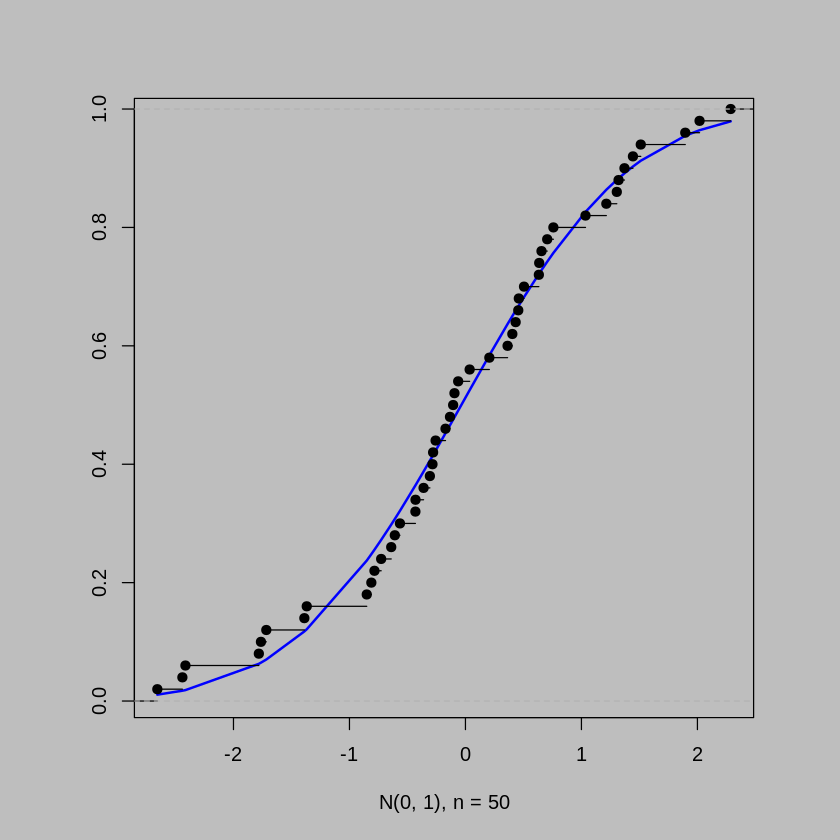

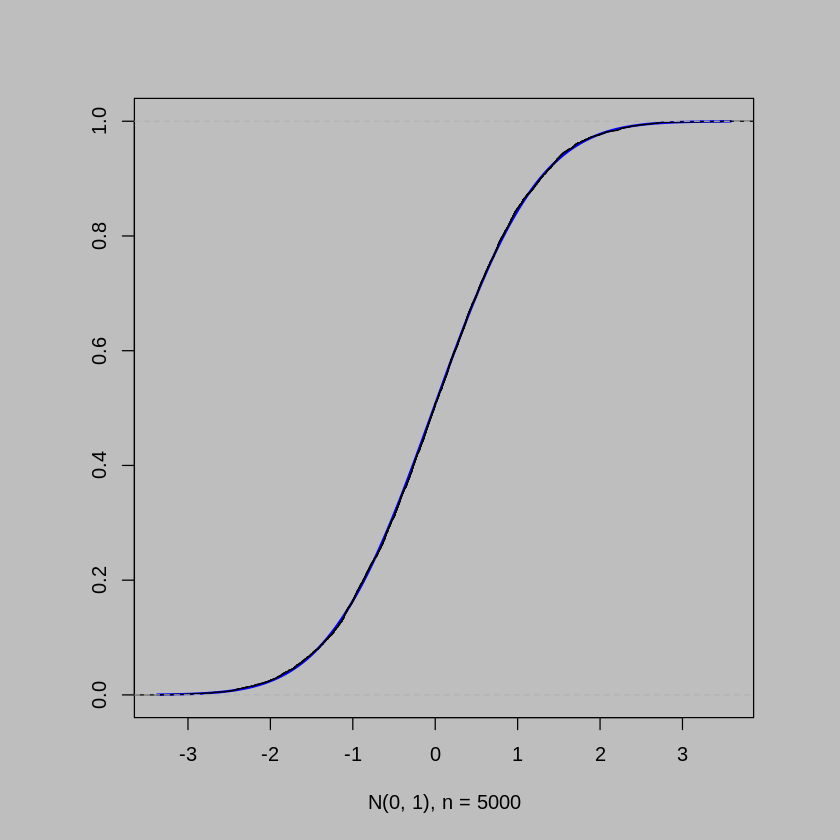

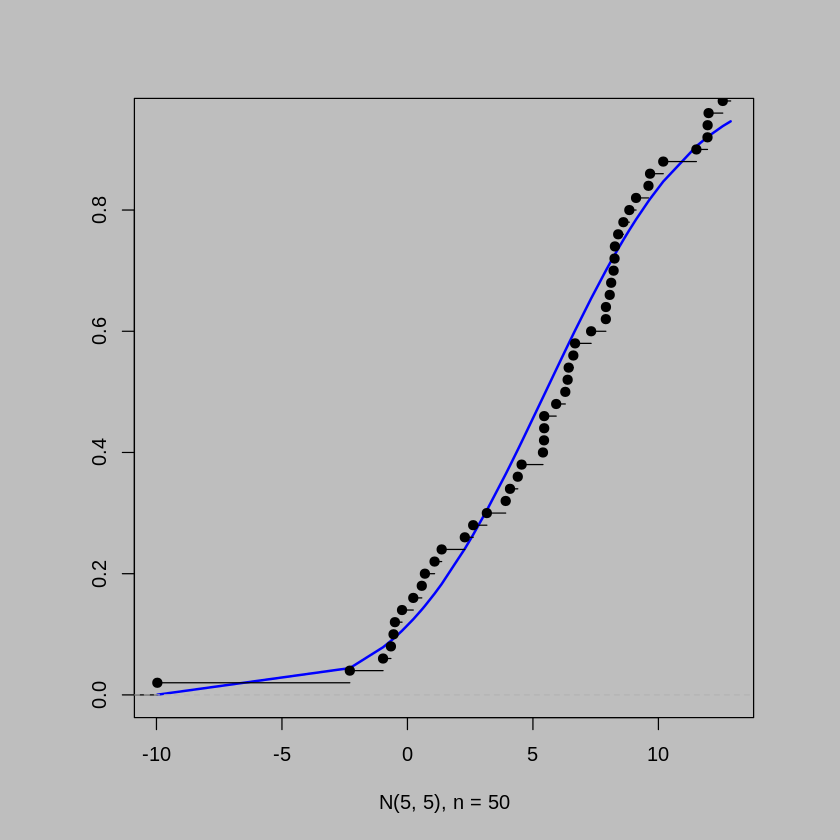

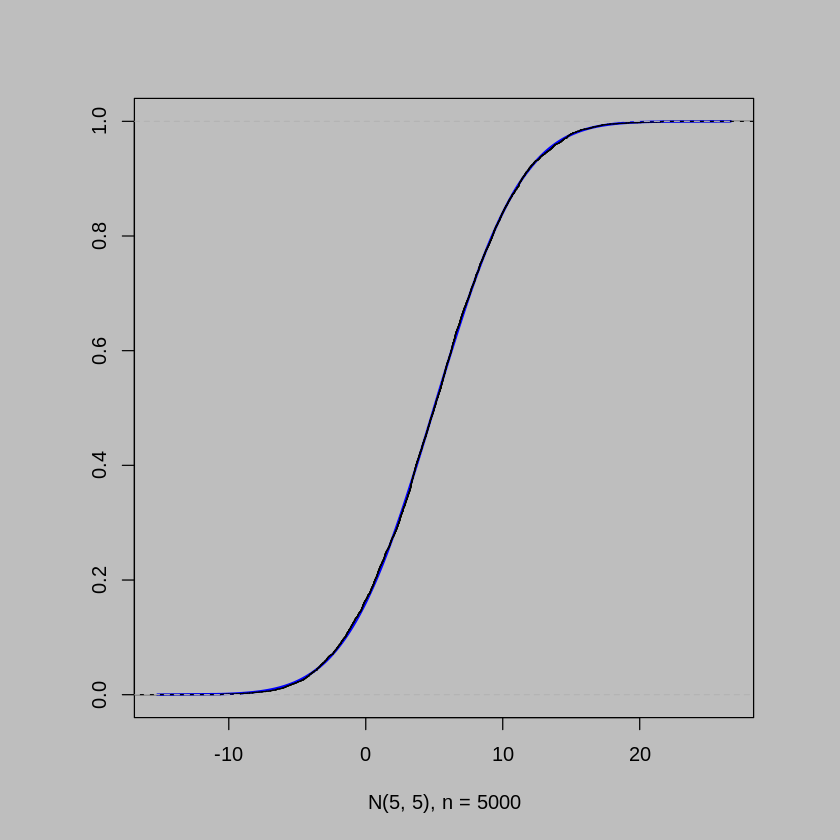

In [ ]:
#Эпирические функции распределения

## N(0, 1)
par(mfrow=c(1, 1), pty = "s", bg = "grey")
plot(data_50[1, ],pnorm(data_50[1, ], mean = data_mle_50_1$estimate[1], sd = data_mle_50_1$estimate[2]),
     type = "l", col = "blue", lwd = 2, xlab = "N(0, 1), n = 50", ylab = "",)
plot(ecdf(data_50[1,]), add = T, col = "black")

par(mfrow=c(1, 1), pty = "s", bg = "grey")
plot(data_5000[1, ],pnorm(data_5000[1, ], mean = data_mle_5000_1$estimate[1], sd = data_mle_5000_1$estimate[2]),
     type = "l", col = "blue", lwd = 2, xlab = "N(0, 1), n = 5000", ylab = "",)
plot(ecdf(data_5000[1,]), add = T, col = "black")

## N(5, 5)
par(mfrow=c(1, 1), pty = "s", bg = "grey")
plot(data_50[2, ],pnorm(data_50[2, ], mean = data_mle_50_2$estimate[1], sd = data_mle_50_2$estimate[2]),
     type = "l", col = "blue", lwd = 2, xlab = "N(5, 5), n = 50", ylab = "",)
plot(ecdf(data_50[2,]), add = T, col = "black")

par(mfrow=c(1, 1), pty = "s", bg = "grey")
plot(data_5000[2, ],pnorm(data_5000[2, ], mean = data_mle_5000_2$estimate[1], sd = data_mle_5000_2$estimate[2]),
     type = "l", col = "blue", lwd = 2, xlab = "N(5, 5), n = 5000", ylab = "",)
plot(ecdf(data_5000[2,]), add = T, col = "black")

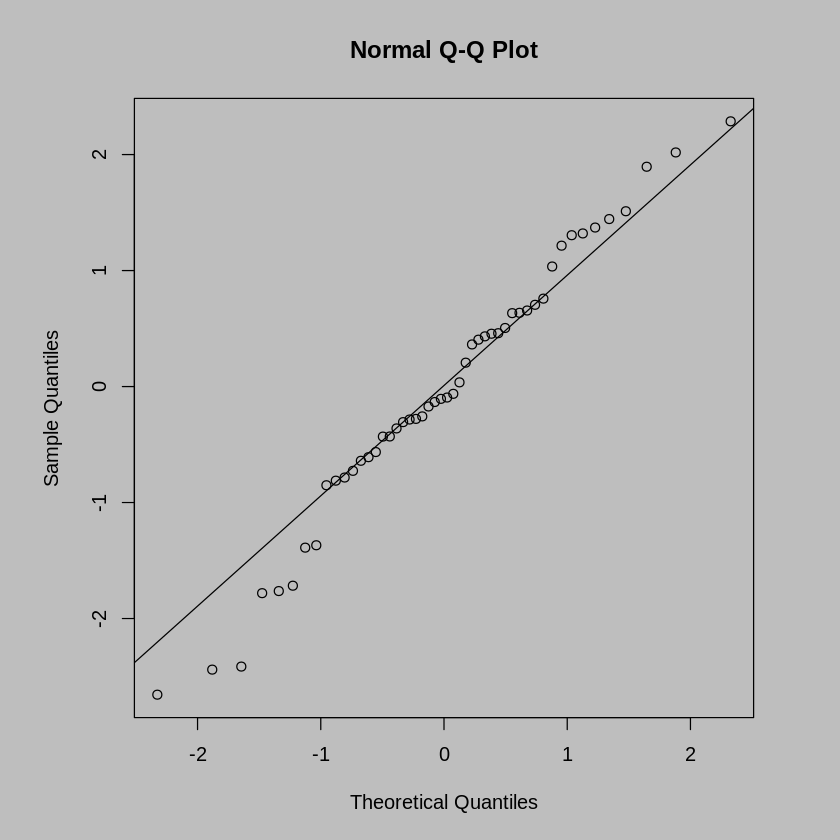

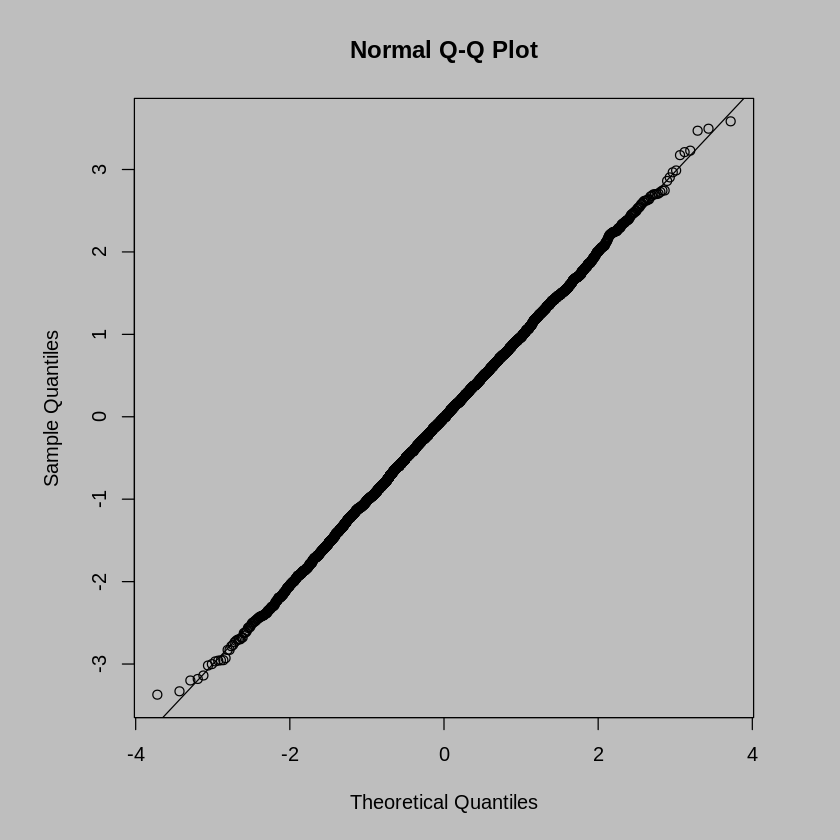

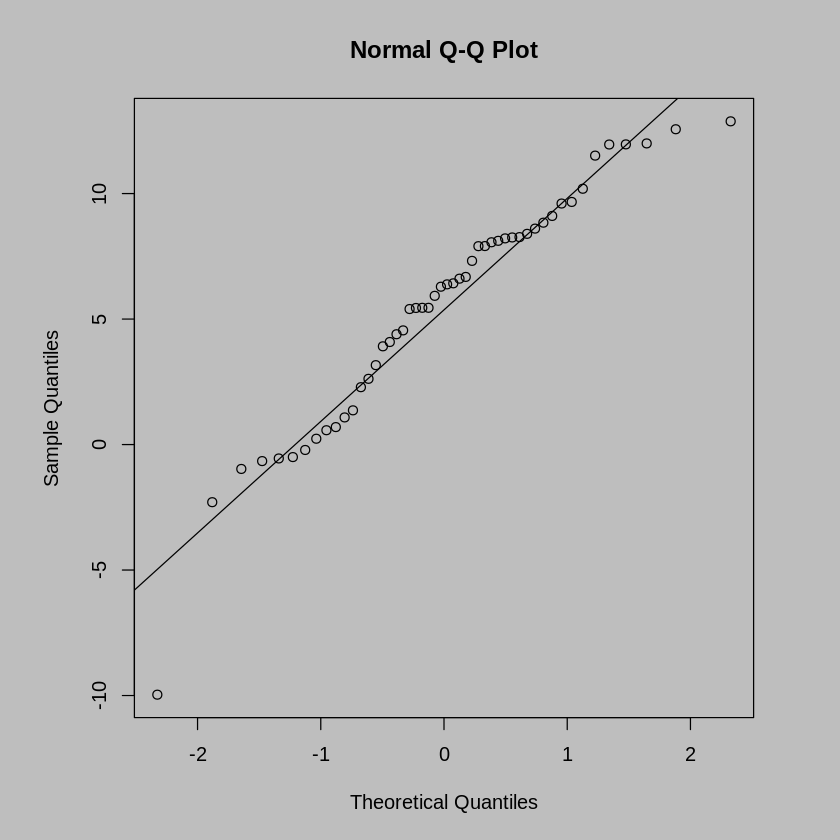

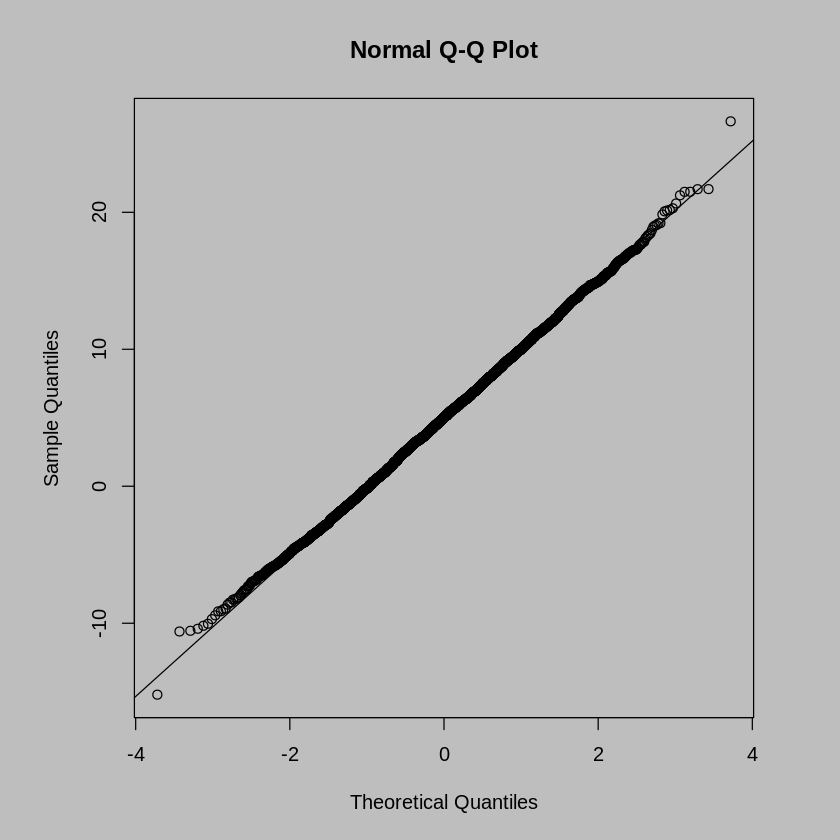

In [ ]:
#Квантили

##N(0, 1)
par(mfrow = c(1,1), pty = "s", bg = "grey")
qqnorm(data_50[1,])
qqline(data_50[1,])

par(mfrow = c(1,1), pty = "s", bg = "grey")
qqnorm(data_5000[1,])
qqline(data_5000[1,])

##N(5, 5)
par(mfrow = c(1,1), pty = "s", bg = "grey")
qqnorm(data_50[2,])
qqline(data_50[2,])

par(mfrow = c(1,1), pty = "s", bg = "grey")
qqnorm(data_5000[2,])
qqline(data_5000[2,])

In [ ]:
#Стандартные процедуры проверки гипотез о нормальности

##N(0, 1)

###Критерий Колмогорова-Смирнова
ks.test(data_50[1, ],pnorm, mean = data_mle_50_1$estimate[1], sd = data_mle_50_1$estimate[2])
ks.test(data_5000[1, ],pnorm, mean = data_mle_5000_1$estimate[1], sd = data_mle_5000_1$estimate[2])

###Критерий Шапиров-Уилка
shapiro.test(data_50[1,])
shapiro.test(data_5000[1,])

###Критерий Андерсона-Дарлинга
ad.test(data_50[1,])
ad.test(data_5000[1,])

###Критерий Крамера фон Мизеса
cvm.test(data_50[1,])
cvm.test(data_5000[1,])

###Критерий Колмогорова-Смирнова в модификации Лиллиефорса
lillie.test(data_50[1,])
lillie.test(data_5000[1,])

###Критерий Шапиро-Франсия
sf.test(data_50[1,])
sf.test(data_5000[1,])


	Exact one-sample Kolmogorov-Smirnov test

data:  data_50[1, ]
D = 0.077249, p-value = 0.9041
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data_5000[1, ]
D = 0.0060568, p-value = 0.993
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  data_50[1, ]
W = 0.98021, p-value = 0.5611



	Shapiro-Wilk normality test

data:  data_5000[1, ]
W = 0.99974, p-value = 0.8223



	Anderson-Darling normality test

data:  data_50[1, ]
A = 0.30904, p-value = 0.5461



	Anderson-Darling normality test

data:  data_5000[1, ]
A = 0.23862, p-value = 0.7809



	Cramer-von Mises normality test

data:  data_50[1, ]
W = 0.045096, p-value = 0.5805



	Cramer-von Mises normality test

data:  data_5000[1, ]
W = 0.033516, p-value = 0.7955



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_50[1, ]
D = 0.079475, p-value = 0.5981



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_5000[1, ]
D = 0.0060672, p-value = 0.927



	Shapiro-Francia normality test

data:  data_50[1, ]
W = 0.98374, p-value = 0.623



	Shapiro-Francia normality test

data:  data_5000[1, ]
W = 0.9998, p-value = 0.9057



	Exact one-sample Kolmogorov-Smirnov test

data:  data_50[2, ]
D = 0.11097, p-value = 0.5327
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data_5000[2, ]
D = 0.0069507, p-value = 0.9691
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  data_50[2, ]
W = 0.94937, p-value = 0.03213



	Shapiro-Wilk normality test

data:  data_5000[2, ]
W = 0.99964, p-value = 0.5261



	Anderson-Darling normality test

data:  data_50[2, ]
A = 0.60312, p-value = 0.1111



	Anderson-Darling normality test

data:  data_5000[2, ]
A = 0.30882, p-value = 0.5586



	Cramer-von Mises normality test

data:  data_50[2, ]
W = 0.09736, p-value = 0.1186



	Cramer-von Mises normality test

data:  data_5000[2, ]
W = 0.041873, p-value = 0.6471



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_50[2, ]
D = 0.11106, p-value = 0.1282



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_5000[2, ]
D = 0.0069628, p-value = 0.8064



	Shapiro-Francia normality test

data:  data_50[2, ]
W = 0.94693, p-value = 0.02727



	Shapiro-Francia normality test

data:  data_5000[2, ]
W = 0.99958, p-value = 0.2999


In [ ]:
##N(5, 5)

###Критерий Колмогорова-Смирнова
ks.test(data_50[2, ],pnorm, mean = data_mle_50_2$estimate[1], sd = data_mle_50_2$estimate[2])
ks.test(data_5000[2, ],pnorm, mean = data_mle_5000_2$estimate[1], sd = data_mle_5000_2$estimate[2])

###Критерий Шапиров-Уилка
shapiro.test(data_50[2,])
shapiro.test(data_5000[2,])

###Критерий Андерсона-Дарлинга
ad.test(data_50[2,])
ad.test(data_5000[2,])

###Критерий Крамера фон Мизеса
cvm.test(data_50[2,])
cvm.test(data_5000[2,])

###Критерий Колмогорова-Смирнова в модификации Лиллиефорса
lillie.test(data_50[2,])
lillie.test(data_5000[2,])

###Критерий Шапиро-Франсия
sf.test(data_50[2,])
sf.test(data_5000[2,])

**7. Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев: a. Стьюдента, включая односторонние варианты, когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних значений больше (или меньше) другого. Реализовать оценку мощности критериев при заданном объеме выборки или определения объема выборки для достижения заданной мощности;
b. Уилкоксона-Манна-Уитни (ранговые);
c. Фишера, Левене, Бартлетта, Флигнера-Килина (проверка
гипотез об однородности дисперсий).**

In [ ]:
# Student's t-test

data1 = fifa$Ratings 
data2 = (fifa$PAC + fifa$SHO + fifa$PAS + fifa$DRI + fifa$DEF + fifa$PHY) / 6

In [ ]:
# Двусторонний
# Гипотеза H₀: Средние двух выборок равны, альтернативная гипотеза - не равны
for (alpha in c(0.01, 0.05, 0.1))
  print(t.test(data1, data2, var.equal = TRUE, conf.level = 1 - alpha), alternative = "less")
  print(t.test(data1, data2, var.equal = TRUE, conf.level = 1 - alpha), alternative = "greater")
  print(t.test(data1, data2, var.equal = TRUE, conf.level = 1 - alpha), alternative = "two-sided")


	Two Sample t-test

data:  data1 and data2
t = 76.47, df = 32910, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 6.084668 6.508895
sample estimates:
mean of x mean of y 
 66.97928  60.68250 


	Two Sample t-test

data:  data1 and data2
t = 76.47, df = 32910, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 6.135386 6.458176
sample estimates:
mean of x mean of y 
 66.97928  60.68250 


	Two Sample t-test

data:  data1 and data2
t = 76.47, df = 32910, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 6.161335 6.432227
sample estimates:
mean of x mean of y 
 66.97928  60.68250 


	Two Sample t-test

data:  data1 and data2
t = 76.47, df = 32910, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 6.161335 6.432227
sampl

In [ ]:
wilcox.test(data1, data2, paired = T)


	Wilcoxon signed rank test with continuity correction

data:  data1 and data2
V = 134105142, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(car)
print(var.test(data1, data2))
print(leveneTest(data1, data2))
print(fligner.test(data1, data2))


	F test to compare two variances

data:  data1 and data2
F = 1.1404, num df = 16455, denom df = 16455, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.106037 1.175745
sample estimates:
ratio of variances 
          1.140358 



Warning message in leveneTest.default(data1, data2):
“data2 coerced to factor.”


Levene's Test for Homogeneity of Variance (center = median)
         Df F value    Pr(>F)    
group   273   2.108 < 2.2e-16 ***
      16182                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

	Fligner-Killeen test of homogeneity of variances

data:  data1 and data2
Fligner-Killeen:med chi-squared = 569.07, df = 273, p-value < 2.2e-16



In [ ]:
print(bartlett.test(fifa$Ratings, fifa$SKI, conf.level = 1 - alpha))


	Bartlett test of homogeneity of variances

data:  fifa$Ratings and fifa$SKI
Bartlett's K-squared = 204.48, df = 5, p-value < 2.2e-16



**8. Исследовать корреляционные взаимосвязи в данных с помощью
коэффициентов корреляции Пирсона, Спирмена и Кендалла.**

In [ ]:
cor(fifa$PAC, fifa$DRI, method = "pearson")
cor(fifa$PAC, fifa$DRI, method = "spearman")
cor(fifa$PAC, fifa$DRI, method = "kendall")

[1] 0.5486414

[1] 0.5419507

[1] 0.3911928

Корреляция скорости и дриблинга у игроков незначительная, но всё же положительная.

**9.Продемонстрировать использование методов хи-квадрат, точного
теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля.**

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
table = table(top$PAC > 75, top$DRI > 75)

In [ ]:
# критерий хи-квадрат Пирсона. Нулевая гипотеза - переменные независимы (скорость и дриблинг)
chisq.test(table)

Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  table
X-squared = 11.971, df = 1, p-value = 0.0005403


In [ ]:
# точный тест Фишера 
fisher.test(table)


	Fisher's Exact Test for Count Data

data:  table
p-value = 0.001605
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  2.191526 76.508945
sample estimates:
odds ratio 
  12.34622 


In [ ]:
# тест МакНемара
mcnemar.test(table)


	McNemar's Chi-squared test with continuity correction

data:  table
McNemar's chi-squared = 0.75, df = 1, p-value = 0.3865


**10.Проверить наличие мультиколлинеарности в данных с помощью
корреляционной матрицы и фактора инфляции дисперсии.**

In [ ]:
print(vif(lm(fifa$Ratings ~ fifa$PAC + fifa$SHO + fifa$PAS + fifa$DRI + fifa$DEF + fifa$PHY)))

fifa$PAC fifa$SHO fifa$PAS fifa$DRI fifa$DEF fifa$PHY 
1.674638 5.290872 6.432600 7.639174 3.163944 1.671228 


**11.Исследовать зависимости в данных с помощью дисперсионного
анализа.**

In [ ]:
fit <- aov(best$Ratings ~ as.factor(best$Country))

summary(fit)
#Последние два столбца f-value и p-value

TukeyHSD(fit)
#В колонке p adj приводятся значения p-value

                        Df Sum Sq Mean Sq F value Pr(>F)
as.factor(best$Country)  8  8.776   1.097   0.524  0.816
Residuals               11 23.024   2.093               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = best$Ratings ~ as.factor(best$Country))

$`as.factor(best$Country)`
                                   diff       lwr      upr     p adj
France-Brazil                -0.5238095 -4.302795 3.255176 0.9996968
Germany-Brazil               -1.3571429 -5.747927 3.033641 0.9477721
Hungary-Brazil               -0.8571429 -6.711522 4.997236 0.9995494
Italy-Brazil                 -1.3571429 -5.747927 3.033641 0.9477721
Netherlands-Brazil           -1.3571429 -5.747927 3.033641 0.9477721
Northern Ireland-Brazil      -1.8571429 -7.711522 3.997236 0.9403321
Portugal-Brazil              -1.8571429 -7.711522 3.997236 0.9403321
Russia-Brazil                -0.8571429 -6.711522 4.997236 0.9995494
Germany-France               -0.8333333 -5.832461 4.165794 0.9988680
Hungary-France               -0.3333333 -6.656785 5.990119 0.9999998
Italy-France                 -0.8333333 -5.832461 4.165794 0.9988680
Netherlan

**12. Подогнать регрессионные модели (в том числе, нелинейные) к
данным, а также оценить качество подобной аппроксимации.**

Исследуем зависимость показателя DRI - дриблинг
от SKI - скиллы (особые приёмы, а проще говоря, финты)

Явно верится, что они должны быть как-то пропорциональны. Проверим:

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 5.025”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.025”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  6.0301e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 5.025”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 2.025”
Warning message in pr

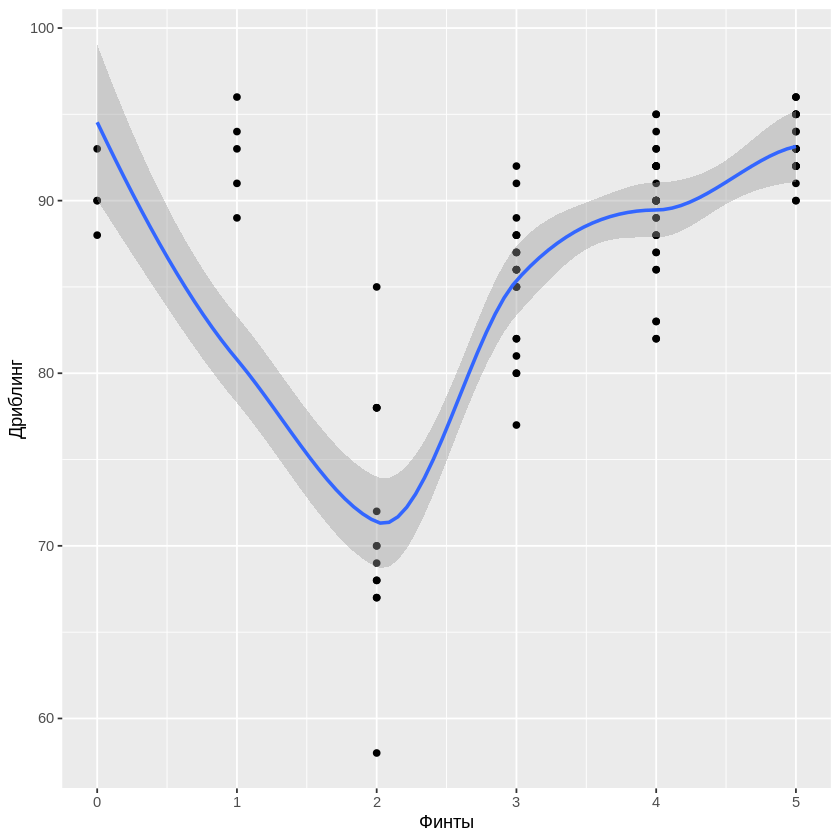


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.462  -1.685   1.315   3.315  15.149 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  78.2394     1.9249  40.646  < 2e-16 ***
x             2.6113     0.5258   4.966 2.89e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.863 on 98 degrees of freedom
Multiple R-squared:  0.201,	Adjusted R-squared:  0.1929 
F-statistic: 24.66 on 1 and 98 DF,  p-value: 2.893e-06


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,1161.66,1161.66013,24.66023,2.892882e-06
Residuals,98,4616.45,47.10663,NA,NA


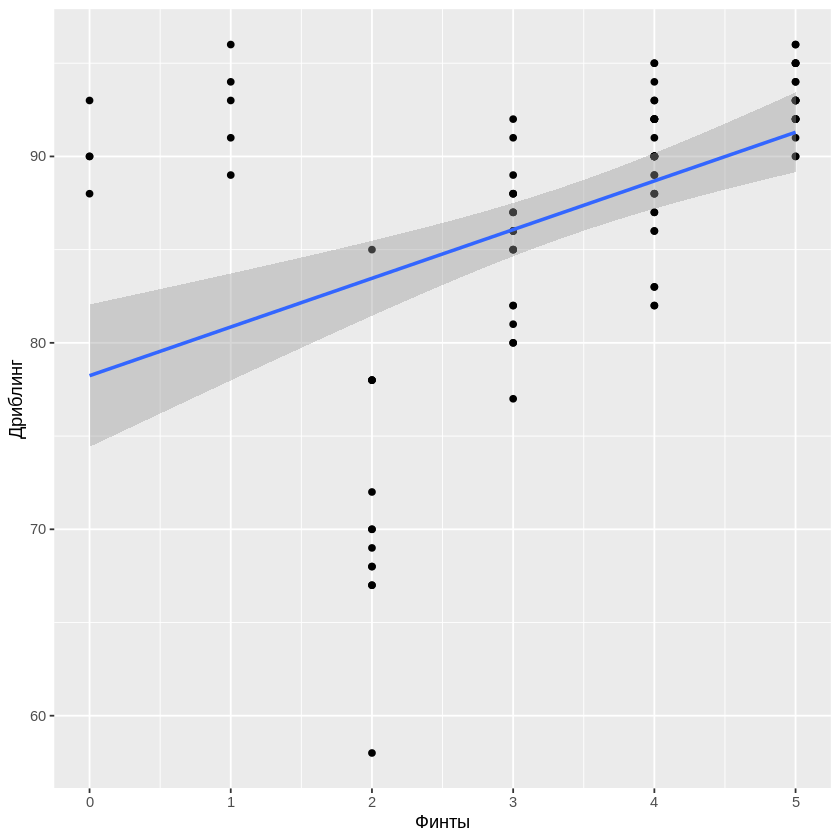


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
     Min       1Q   Median       3Q      Max 
-23.5330  -2.9783   0.7055   4.1271  12.5597 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    87.17       0.60 145.284  < 2e-16 ***
poly(x, 2)1    34.08       6.00   5.681  1.4e-07 ***
poly(x, 2)2    33.53       6.00   5.589  2.1e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6 on 97 degrees of freedom
Multiple R-squared:  0.3957,	Adjusted R-squared:  0.3832 
F-statistic: 31.75 on 2 and 97 DF,  p-value: 2.468e-11


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"poly(x, 2)",2,2286.124,1143.06176,31.75184,2.468353e-11
Residuals,97,3491.986,35.99986,NA,NA


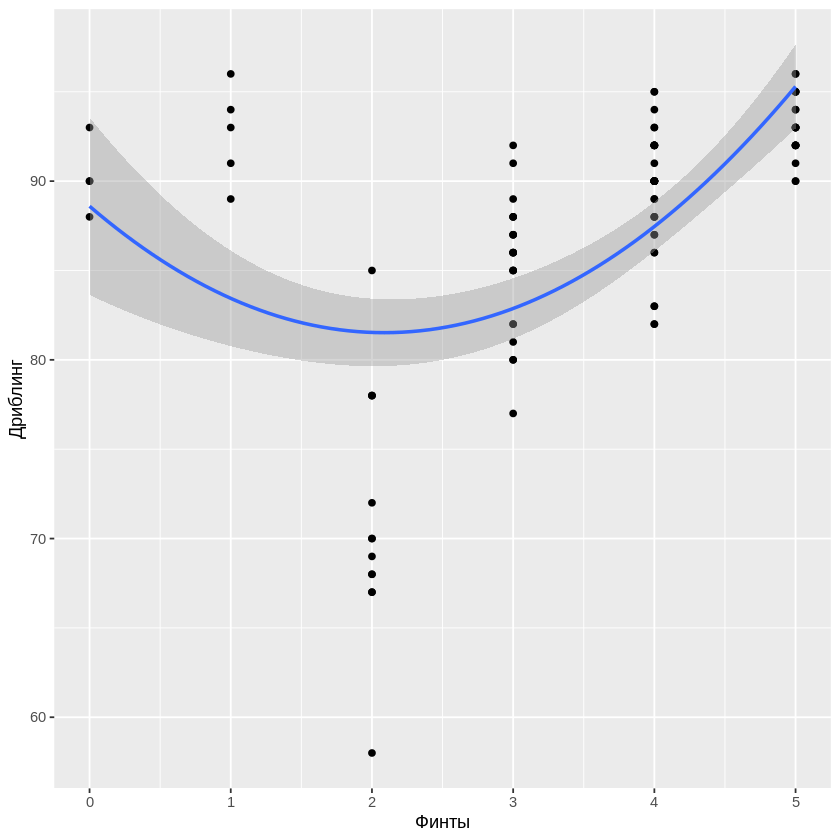

In [ ]:
library(dplyr)
library(ggplot2)

data = top
ds <- data$SKI
y <- data$DRI
data2<- data.frame(y,ds)
y <- data2$y
x <- data2$ds

#автоподбор модели
ggplot(data2, aes(x = ds, y = y)) + geom_point() +
  stat_smooth(method = "auto") + 
  xlab("Финты") + 
  ylab("Дриблинг")

#линейная модель
ggplot(data2, aes(x = ds, y = y)) + geom_point() +
  stat_smooth(method = "lm") + 
  xlab("Финты") + 
  ylab("Дриблинг")

M_reg <- lm(y ~ x)
summary(M_reg)
anova(M_reg)


#нелинейная модель - полином второй степени
ggplot(data2, aes(x = ds, y = y)) + geom_point() +
  stat_smooth(method = "lm", formula = y ~ poly(x,2)) + 
  xlab("Финты") + 
  ylab("Дриблинг")

M_reg2 <- lm(y ~ poly(x,2))
summary(M_reg2)
anova(M_reg2)

Видно, что аппроксимация линейной моделью никуда не годится (только в самом первом приближении), а вот аппроксимация многочленом второй степени уже похожа на ту, что получилась при автоподборе модели